https://youtu.be/LsK-xG1cLYA AdaBoost, Clearly Explained

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [168]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

base = StringIO("""
chest pain	blocked arteries	patient weight	heart disease
TRUE	TRUE	205	TRUE
FALSE	TRUE	180	TRUE
TRUE	FALSE	210	TRUE
TRUE	TRUE	167	TRUE
FALSE	TRUE	156	FALSE
FALSE	TRUE	125	FALSE
TRUE	FALSE	168	FALSE
TRUE	TRUE	172	FALSE
""")

In [169]:
df = pd.read_csv(base, sep="	")
df.head()

chest pain  blocked arteries  patient weight  heart disease
0        True              True             205           True
1       False              True             180           True
2        True             False             210           True
3        True              True             167           True
4       False              True             156          False

In [4]:
def StartWeights(df):
    length = len(df)
    df["weight"] = 1 / length

## Amount of Say
is determined by the formula

$\frac{1}{2} \log (\frac{1-TotalError}{TotalError})$

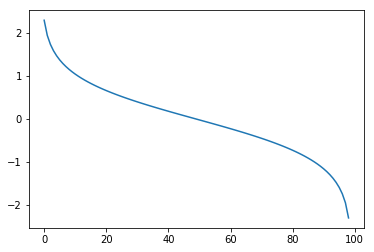

In [5]:
def AmountOfSay(totalError):
    return 0.5 * py.log((1 - totalError)/totalError)

says = []
for i in range(1,100,1):
    totalError = i/100
    says.append(AmountOfSay(totalError))  
plt.plot(says)

## New Sample Weight
is defined by the formula

$\text{sample weight} * e^{\text{amount of say}}$

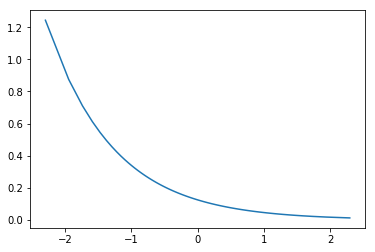

In [6]:
def NewSampleWeight(sampleWeight, amountOfSay, increase = False):
    newSampleWeight = sampleWeight * (((increase) * py.power(py.e, amountOfSay)) + ((1-increase) * py.power(py.e, amountOfSay * -1)))
    return newSampleWeight

weights = []
for i in says:
    weights.append(NewSampleWeight(1/8,i))
plt.plot(says, weights)

## Total error 
is the sum of the weights of the **incorrecly** classified examples

In [17]:
def TotalError(target, predicted, weights):
    error = target != predicted #wrongly predicted
    totalError = sum(weights[error]) #sum up the weights of the wrongly classified observations
    return totalError

In [167]:
import random
def ResampleOnWeights(df,w):
    length = len(df)
    acc_weights = [] #acumutated weights
    ant = 0
    for i in range(length):
        curr_value = w[i] + ant
        acc_weights.append(curr_value)
        ant = curr_value
    
    new_df = df.copy()
    new_df.head()

    for i in range(length):
        rand = random.uniform(0,1)
        result = next(obj for obj in acc_weights if obj > rand)
        index = acc_weights.index(result)
        df_tuple = df.iloc[index,:]
        new_df.iloc[i,:] = df_tuple
        
    return new_df

# inicia processo

### stump structure

In [252]:
classifier = DecisionTreeClassifier(max_depth=1)

In [253]:
StartWeights(df)

x = df.iloc[:,0:3] #predictors
y = df.iloc[:,3] #target
w = df.iloc[:,4] #weights

In [254]:
classifier.fit(x,y)
p = pd.Series(classifier.predict(x)) #predicted values
e = y != p #wrongly predicted observations (errors)

print("total de erros:", sum(e))

total de erros: 0


In [255]:
totalError = TotalError(y,p,w)
totalError

0

In [256]:
AmountOfSay(totalError)

ZeroDivisionError: division by zero

### defines new weights

In [248]:
new_w = []
for i in range(len(e)):
    new_w.append(NewSampleWeight(w[i], AmountOfSay(totalError), e[i]))
new_w_normalized = pd.Series(new_w / sum(new_w))
new_w_normalized

0    0.500000
1    0.071429
2    0.071429
3    0.071429
4    0.071429
5    0.071429
6    0.071429
7    0.071429
dtype: float64

In [249]:
w = new_w_normalized
df.iloc[:,4] = w

In [250]:
new_df = ResampleOnWeights(df,w)
StartWeights(new_df)

In [251]:
df = new_df
df.head()

chest pain  blocked arteries  patient weight  heart disease  weight
0        True              True             172          False   0.125
1        True              True             172          False   0.125
2        True              True             172          False   0.125
3        True              True             172          False   0.125
4        True              True             167           True   0.125